In [8]:
#!pip install required for google collab
!pip install pandas_datareader
!pip install yfinance
!pip install fix_yahoo_finance
!pip install requests-html
!pip install pandas_datareader --upgrade
!pip install keras
!pip install sklearn
!pip install pmdarima
!pip install statsmodels
!pip install finnhub-python

import finnhub as finnhub
import requests as requests
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf
import pandas_datareader.data as data
import urllib.request
import zipfile

from matplotlib.ticker import FuncFormatter

# render the figures in this not
%matplotlib inline

# For Predictive Models
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout   
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller




  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8492 sha256=e07921424d88e5cd1171d68aa1c17f32c0ba84910005231179c81f55a12169ed
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7062 sha256=e7fcdb41247783d12a355ab6321b9a7b17d7a28b7e95c90c42ef4fde9f166e72
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\44\7c\7f\ec81717ef91a3feb245984b619e6828141568aa292797b7ac3
Successfully built fix-yahoo-finance
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=6791b545d4996cee28da12fe166aba7c36600ab3626f27f5e4689b9cd5730985
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
  Created wheel for bs4: filename=bs4-0.0.1-py

Requirement already up-to-date: pandas_datareader in c:\users\asus\anaconda3\lib\site-packages (0.10.0)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=967c4094aca94607dc548cd932850e5028dca22430c3dee6b6fa2cf48e1cbb2b
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


ModuleNotFoundError: No module named 'tensorflow'

# EDA 


In [9]:
tickers = ['BABA']

start_date = '2020-01-01'
end_date = '2021-11-01'

# Use pandas_reader.data.DataReader to load data
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [10]:
panel_data.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BABA,BABA,BABA,BABA,BABA,BABA
Date,,,,,,
2019-12-31,212.100006,212.100006,213.639999,210.729996,212.000000,6773600
2020-01-02,219.770004,219.770004,219.979996,216.539993,216.600006,15873500
2020-01-03,217.000000,217.000000,218.203003,216.009995,216.350006,8604500
2020-01-06,216.639999,216.639999,217.160004,214.089996,214.889999,11885500
2020-01-07,217.630005,217.630005,218.940002,216.690002,217.639999,9388000


In [11]:
panel_data.shape
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464 entries, 2019-12-31 to 2021-11-01
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BABA)  464 non-null    float64
 1   (Close, BABA)      464 non-null    float64
 2   (High, BABA)       464 non-null    float64
 3   (Low, BABA)        464 non-null    float64
 4   (Open, BABA)       464 non-null    float64
 5   (Volume, BABA)     464 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 25.4 KB


In [12]:
close_price = panel_data['Close']
close_price.describe().round(2)

Symbols,BABA
count,464.00
mean,226.60
std,37.76
min,139.63
25%,205.19
50%,222.31
75%,255.88
max,317.14


<AxesSubplot:title={'center':'BABA Stock Price 2020'}, xlabel='Date'>

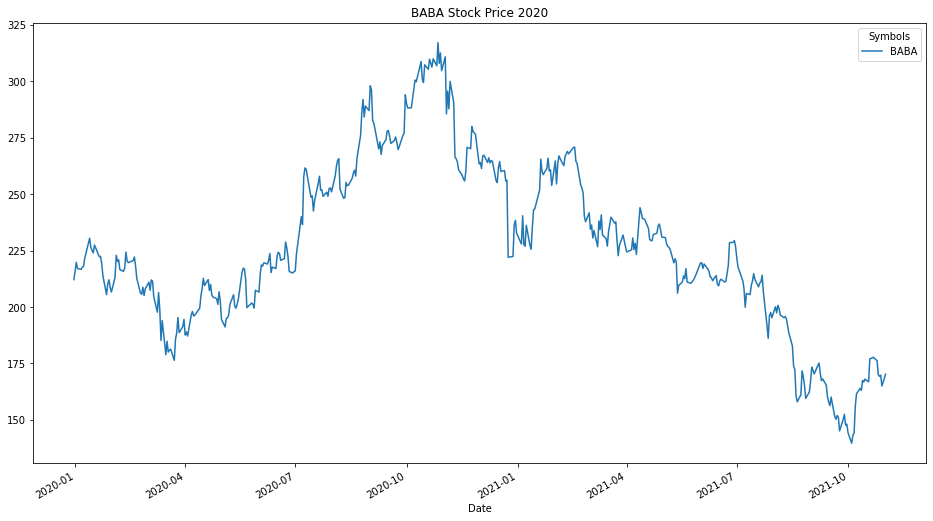

In [13]:
close_price.plot(figsize=(16,9), title = 'BABA Stock Price 2020')


<AxesSubplot:title={'center':'BABA Stock Price from 2001'}, xlabel='Date'>

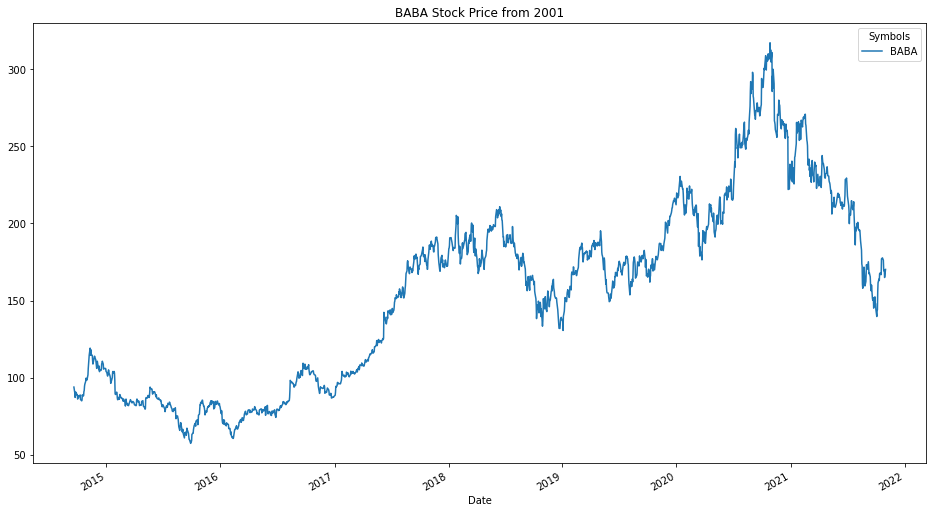

In [14]:
start_date = '2001-01-01'
end_date = '2021-11-01'
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
panel_data['Close'].plot(figsize=(16,9), title = 'BABA Stock Price from 2001')

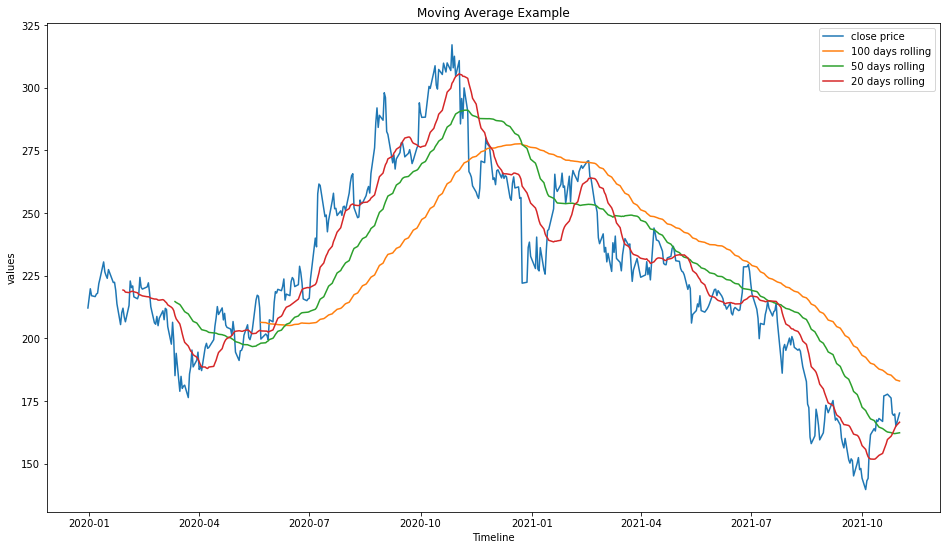

In [15]:
#use the matplotplib fig, axes variables to conveniently plot more than one series in the same plot
#plot close price
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_price, label = 'close price')

#plot 100 day MA on same plot
ma_long_close = close_price.rolling(window=100).mean()
ax.plot(ma_long_close, label='100 days rolling')
#can also use below syntax and specify both x , y for the plot
#ax.plot(ma_long_close.index, ma_long_close, label='100 days rolling')

#plot 50 day and 20 day MA here
#add title and label for the plot
#your code here


ma_long_close = close_price.rolling(window=50).mean()
ax.plot(ma_long_close, label='50 days rolling')

ma_long_close = close_price.rolling(window=20).mean()
ax.plot(ma_long_close, label='20 days rolling')

plt.title('Moving Average Example')
plt.xlabel('Timeline')
plt.ylabel('values')
ax.legend()

In [16]:
ma_long_close = close_price.rolling(window=100).mean()
(ma_long_close)

Symbols,BABA
Date,
2019-12-31,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
...,...
2021-10-26,184.807301
2021-10-27,184.330601
2021-10-28,183.870301


<AxesSubplot:xlabel='Date'>

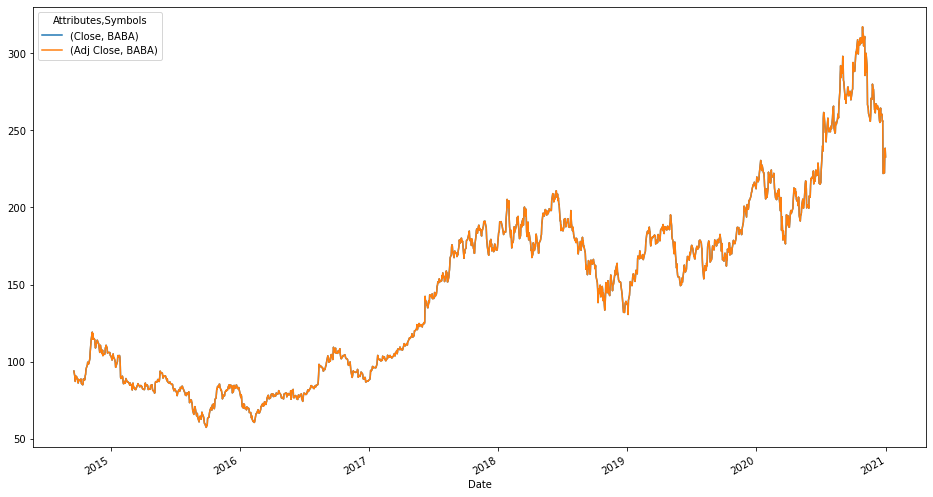

In [17]:
start_date = '2011-01-01'
end_date = '2020-12-31'
spy_panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)


spy_panel_data[['Close','Adj Close']].plot(figsize=(16,9))


<AxesSubplot:xlabel='Date'>

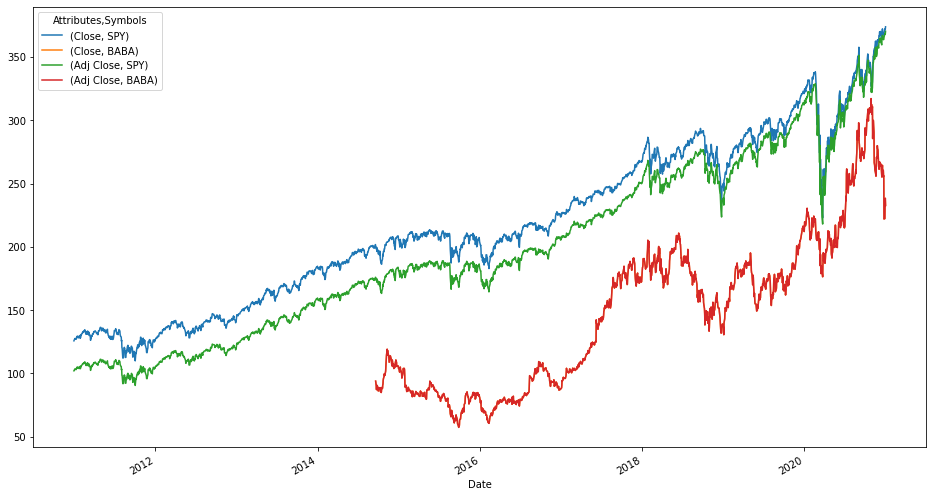

In [18]:
tickers2 =["SPY","BABA"]
spy =data.DataReader(tickers2,'yahoo',start_date,end_date)

spy[['Close','Adj Close']].plot(figsize=(16,9))

# Testing for other Sources - aside from Yahoo - alpha vantage

In [19]:

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=O2OKRPCTU1WQNOFJ'

apiKey= 'O2OKRPCTU1WQNOFJ'

Stock_name = "BABA"

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol='

url = url + Stock_name +"&apikey="  + apiKey

# print (url)

r = requests.get(url)
stock_data = r.json()

# print(stock_data)

In [20]:
AlphavantagePd = pd.DataFrame(stock_data["Time Series (Daily)"])

print (AlphavantagePd )

          2021-11-18 2021-11-17 2021-11-16 2021-11-15 2021-11-12 2021-11-11  \
1. open     146.9100   168.0200   168.6000   167.2200   165.1735   166.5600   
2. high     148.5000   168.3000   169.9400   168.4600   167.8000   169.6300   
3. low      141.8900   161.1350   166.6700   165.6700   163.4000   166.5600   
4. close    143.6000   161.5800   168.4300   166.5400   166.8100   167.8500   
5. volume   61571451   18829528   11887505    9655711   12818274   16747451   

          2021-11-10 2021-11-09 2021-11-08 2021-11-05  ... 2021-07-14  \
1. open     163.6800   162.1600   161.7650   164.7950  ...   215.5000   
2. high     166.4800   164.4800   162.1600   164.7950  ...   216.3500   
3. low      161.8200   159.5400   159.4800   158.3000  ...   211.0300   
4. close    163.9700   160.1900   162.1600   158.7300  ...   211.5000   
5. volume   17216798   13916310   16223104   22098218  ...   19484214   

          2021-07-13 2021-07-12 2021-07-09 2021-07-08 2021-07-07 2021-07-06  \
1. open

In [21]:
#to flip it
AlphavantagePd = AlphavantagePd.T

print (AlphavantagePd )


             1. open   2. high    3. low  4. close 5. volume
2021-11-18  146.9100  148.5000  141.8900  143.6000  61571451
2021-11-17  168.0200  168.3000  161.1350  161.5800  18829528
2021-11-16  168.6000  169.9400  166.6700  168.4300  11887505
2021-11-15  167.2200  168.4600  165.6700  166.5400   9655711
2021-11-12  165.1735  167.8000  163.4000  166.8100  12818274
...              ...       ...       ...       ...       ...
2021-07-07  211.6100  212.0500  207.8200  208.0000  18340424
2021-07-06  215.3200  215.4000  209.3733  211.6000  23719916
2021-07-02  219.1600  219.5000  216.4600  217.7500  12998035
2021-07-01  228.0700  228.8500  221.5500  221.8700  13327738
2021-06-30  226.9900  227.9800  225.6800  226.7800   9348629

[100 rows x 5 columns]


In [22]:
panel_data.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BABA,BABA,BABA,BABA,BABA,BABA
Date,,,,,,
2021-10-26,169.990005,169.990005,174.899994,167.479996,174.479996,17577000
2021-10-27,169.229996,169.229996,172.449997,167.339996,167.529999,11801800
2021-10-28,169.789993,169.789993,170.350006,166.770004,168.490005,12440100
2021-10-29,164.940002,164.940002,168.559998,162.720001,167.070007,17155400
2021-11-01,170.169998,170.169998,171.895004,165.800003,165.839996,17609500


In [23]:
AlphavantagePd.head()

,1. open,2. high,3. low,4. close,5. volume
2021-11-18,146.9100,148.5000,141.8900,143.6000,61571451
2021-11-17,168.0200,168.3000,161.1350,161.5800,18829528
2021-11-16,168.6000,169.9400,166.6700,168.4300,11887505
2021-11-15,167.2200,168.4600,165.6700,166.5400,9655711
2021-11-12,165.1735,167.8000,163.4000,166.8100,12818274


# EDA for multiple tickers 

In [24]:
# 1. Get inputs from UI

tickers = ['TM', 'TSLA', 'AMD', 'BABA']
start_date = '2011-01-01'
end_date = '2021-11-01'

# 2. Save all tickers to a dict 
df_dict = {}
for ticker in tickers:
    df_dict[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)

Inspect the recent 5 data points for each ticker

In [25]:
for i in range(0, len(tickers)):
    print("----------Prices and Volume for " + tickers[i] + "----------")
    display(df_dict[tickers[i]].tail())

----------Prices and Volume for TM----------


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,174.789993,172.809998,173.630005,173.199997,145400.0,173.199997
2021-10-27,175.289993,174.009995,174.809998,174.089996,205500.0,174.089996
2021-10-28,176.479996,175.289993,175.289993,176.479996,181400.0,176.479996
2021-10-29,176.690002,175.619995,176.199997,176.570007,164800.0,176.570007
2021-11-01,179.979996,178.130005,178.130005,179.979996,219100.0,179.979996


----------Prices and Volume for TSLA----------


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,1094.939941,1001.440002,1024.689941,1018.429993,62415000.0,1018.429993
2021-10-27,1070.880005,1030.780029,1039.660034,1037.859985,38526500.0,1037.859985
2021-10-28,1081.000000,1054.199951,1068.310059,1077.040039,27213200.0,1077.040039
2021-10-29,1115.209961,1073.209961,1081.859985,1114.000000,29918400.0,1114.000000
2021-11-01,1209.750000,1118.660034,1145.000000,1208.589966,56048700.0,1208.589966


----------Prices and Volume for AMD----------


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,127.199997,122.580002,122.989998,122.930000,59458900,122.930000
2021-10-27,128.080002,121.050003,121.629997,122.279999,98245300,122.279999
2021-10-28,123.500000,120.260002,122.860001,121.160004,58002500,121.160004
2021-10-29,122.570000,119.879997,120.949997,120.230003,43289800,120.230003
2021-11-01,125.669998,118.129997,119.449997,125.230003,54559800,125.230003


----------Prices and Volume for BABA----------


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,174.899994,167.479996,174.479996,169.990005,17577000,169.990005
2021-10-27,172.449997,167.339996,167.529999,169.229996,11801800,169.229996
2021-10-28,170.350006,166.770004,168.490005,169.789993,12440100,169.789993
2021-10-29,168.559998,162.720001,167.070007,164.940002,17155400,164.940002
2021-11-01,171.895004,165.800003,165.839996,170.169998,17609500,170.169998


Checking for missing values

In [26]:
for i in range(0, len(tickers)):
    print("----------" + tickers[i] + "----------")
    display(df_dict[tickers[i]].isnull().sum())

----------TM----------


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

----------TSLA----------


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

----------AMD----------


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

----------BABA----------


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Describing the Close Price

In [27]:
for i in range(0, len(tickers)):
    print(tickers[i] + ":")
    display(df_dict[tickers[i]]["Close"].describe().round(1))

TM:


count    2728.0
mean      117.5
std        24.3
min        60.4
25%       106.6
50%       120.2
75%       130.4
max       186.5
Name: Close, dtype: float64

TSLA:


count    2728.0
mean      114.5
std       200.0
min         4.4
25%        28.7
50%        47.0
75%        66.8
max      1208.6
Name: Close, dtype: float64

AMD:


count    2728.0
mean       21.2
std        28.1
min         1.6
25%         3.7
50%         7.9
75%        26.4
max       125.2
Name: Close, dtype: float64

BABA:


count    1793.0
mean      155.0
std        60.6
min        57.4
25%        94.0
50%       165.6
75%       195.2
max       317.1
Name: Close, dtype: float64

Plotting the Adjusted Closing Price

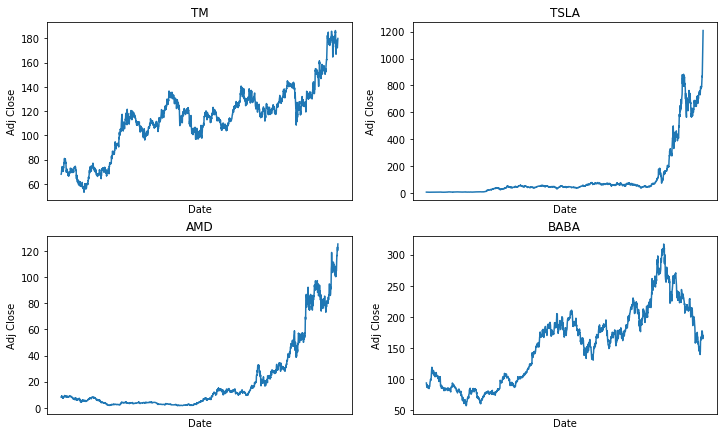

In [28]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range (1, len(tickers)+1):
    plt.subplot(3, 2, i)
    df_dict[tickers[i-1]]["Adj Close"].plot()
    
    plt.tick_params(labelbottom = False, bottom = False)
    plt.ylabel("Adj Close")
    plt.title(tickers[i-1])

Moving Average with lag of 50 days and 200 days

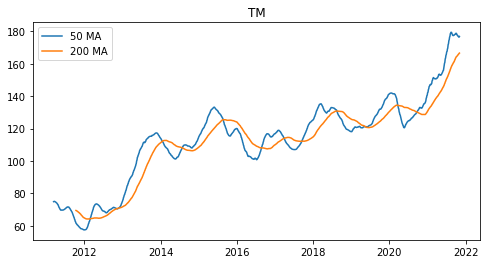

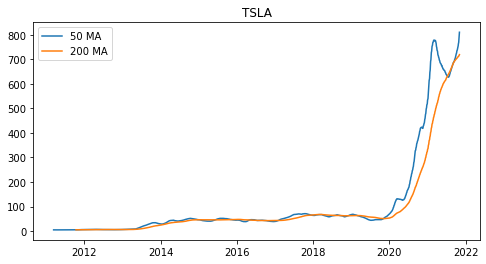

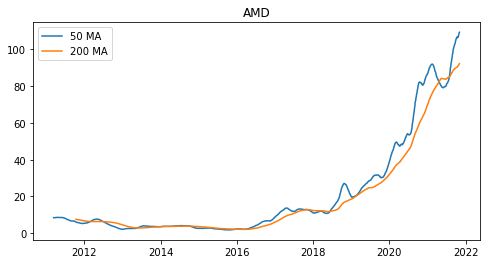

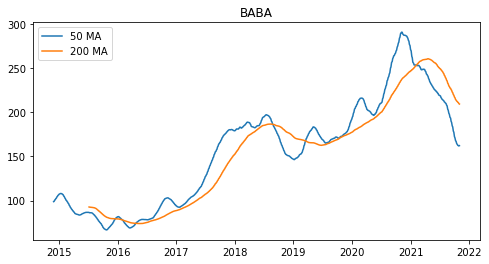

In [29]:
for i in range (1, len(tickers)+1):
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(tickers[i-1])
    
    # 50 days 
    ma_50 = df_dict[tickers[i-1]]["Adj Close"].rolling(window=50).mean()
    ax.plot(ma_50, label = "50 MA")
    
    # 200 days 
    ma_200 = df_dict[tickers[i-1]]["Adj Close"].rolling(window=200).mean()
    ax.plot(ma_200, label = "200 MA")
    ax.legend() 

## Volatility 
To see the how extensive the fluctuations of the stock prices





In [30]:
for i in range(0, len(tickers)):
  print("----------Close prices " + tickers[i] + "----------")
  display(df_dict[tickers[i]].filter(["Close"]))

----------Close prices TM----------


,Close
Date,
2010-12-31,78.629997
2011-01-03,79.430000
2011-01-04,79.860001
2011-01-05,80.199997
2011-01-06,81.540001
...,...
2021-10-26,173.199997
2021-10-27,174.089996
2021-10-28,176.479996


----------Close prices TSLA----------


,Close
Date,
2010-12-31,5.326000
2011-01-03,5.324000
2011-01-04,5.334000
2011-01-05,5.366000
2011-01-06,5.576000
...,...
2021-10-26,1018.429993
2021-10-27,1037.859985
2021-10-28,1077.040039


----------Close prices AMD----------


,Close
Date,
2010-12-31,8.180000
2011-01-03,8.470000
2011-01-04,8.770000
2011-01-05,8.910000
2011-01-06,8.690000
...,...
2021-10-26,122.930000
2021-10-27,122.279999
2021-10-28,121.160004


----------Close prices BABA----------


,Close
Date,
2014-09-19,93.889999
2014-09-22,89.889999
2014-09-23,87.169998
2014-09-24,90.570000
2014-09-25,88.919998
...,...
2021-10-26,169.990005
2021-10-27,169.229996
2021-10-28,169.789993


In [31]:
volatility_dict = {}
for i in range(0, len(tickers)):
    print("Volatility for " + tickers[i] + ":")
    volatility_dict[tickers[i]] = (round(np.sqrt(np.log(df_dict[tickers[i]]["Close"] 
    / df_dict[tickers[i]]["Close"].shift(1)).var()) * np.sqrt(252),2))
    display(volatility_dict[tickers[i]])


Volatility for TM:


0.21

Volatility for TSLA:


0.55

Volatility for AMD:


0.57

Volatility for BABA:


0.34

## Annualized Returns

Stock returns/gains over a period of time


In [32]:
return_series_adj_dict = {}
for i in range(0, len(tickers)):
  return_series_adj_dict[tickers[i]] = (df_dict[tickers[i]]["Adj Close"].pct_change()+ 1).cumprod() - 1

annualized_return_long_dict = {}
for i in range(0, len(tickers)):
  print("Annualized Returns over long period for " + tickers[i] + ":")
  annualized_return_long_dict[tickers[i]] =  ((1 + return_series_adj_dict[tickers[i]].tail(1))**(1/11) - 1)
  display(annualized_return_long_dict[tickers[i]])


Annualized Returns over long period for TM:


Date
2021-11-01    0.092554
Name: Adj Close, dtype: float64

Annualized Returns over long period for TSLA:


Date
2021-11-01    0.63746
Name: Adj Close, dtype: float64

Annualized Returns over long period for AMD:


Date
2021-11-01    0.281514
Name: Adj Close, dtype: float64

Annualized Returns over long period for BABA:


Date
2021-11-01    0.055549
Name: Adj Close, dtype: float64

## Risk Adjusted Return Calculations

In [33]:
#assume a risk free rate of 1%. May change 
risk_free_ann_ret_rate = 0.01

returns_ts_dict = {}
for i in range(0, len(tickers)):
  returns_ts_dict[tickers[i]] = df_dict[tickers[i]]["Adj Close"].pct_change().dropna()

avg_daily_ret_dict = {}
for i in range(0, len(tickers)):
  avg_daily_ret_dict[tickers[i]] = returns_ts_dict[tickers[i]].mean()
#average daily
avg_daily_ret_dict

{'TM': 0.000445546002002716,
 'TSLA': 0.002590260382264823,
 'AMD': 0.0016437611893069198,
 'BABA': 0.0005651588113113461}

In [34]:
#create the risk free rate column
for i in range(0, len(tickers)):
  returns_ts_dict[tickers[i]]['RiskFree_Rate'] = risk_free_ann_ret_rate/252

#display(returns_ts_dict)

#average risk free
avg_rf_ret_dict = {}
for i in range(0, len(tickers)):
  print("----------"+ tickers[i] + " average risk free rate----------")
  avg_rf_ret_dict[tickers[i]] = returns_ts_dict[tickers[i]]['RiskFree_Rate'].mean()
  display(avg_rf_ret_dict[tickers[i]])

----------TM average risk free rate----------


3.968253968253968e-05

----------TSLA average risk free rate----------


3.968253968253968e-05

----------AMD average risk free rate----------


3.968253968253968e-05

----------BABA average risk free rate----------


3.968253968253968e-05

In [35]:
#Add the excess return columns for each ETF
for i in range(0, len(tickers)):
  print("----------"+ tickers[i] + "----------")
  returns_ts_dict[tickers[i]][tickers[i] + ' Excess column'] =  returns_ts_dict[tickers[i]] - returns_ts_dict[tickers[i]]['RiskFree_Rate']
  display(returns_ts_dict[tickers[i]])

----------TM----------


Date
2011-01-03 00:00:00                                             0.010174
2011-01-04 00:00:00                                             0.005414
2011-01-05 00:00:00                                             0.004257
2011-01-06 00:00:00                                             0.016708
2011-01-07 00:00:00                                             0.011283
                                             ...                        
2021-10-28 00:00:00                                             0.013729
2021-10-29 00:00:00                                              0.00051
2021-11-01 00:00:00                                             0.019312
RiskFree_Rate                                                    0.00004
TM Excess column       Date
2011-01-03 00:00:00    0.010134
2011-01-0...
Name: Adj Close, Length: 2729, dtype: object

----------TSLA----------


Date
2011-01-03 00:00:00                                            -0.000376
2011-01-04 00:00:00                                             0.001878
2011-01-05 00:00:00                                             0.005999
2011-01-06 00:00:00                                             0.039135
2011-01-07 00:00:00                                             0.012912
                                             ...                        
2021-10-28 00:00:00                                             0.037751
2021-10-29 00:00:00                                             0.034316
2021-11-01 00:00:00                                              0.08491
RiskFree_Rate                                                    0.00004
TSLA Excess column     Date
2011-01-03 00:00:00   -0.000415
2011-01-0...
Name: Adj Close, Length: 2729, dtype: object

----------AMD----------


Date
2011-01-03 00:00:00                                             0.035452
2011-01-04 00:00:00                                             0.035419
2011-01-05 00:00:00                                             0.015963
2011-01-06 00:00:00                                            -0.024691
2011-01-07 00:00:00                                             0.016111
                                             ...                        
2021-10-28 00:00:00                                            -0.009159
2021-10-29 00:00:00                                            -0.007676
2021-11-01 00:00:00                                             0.041587
RiskFree_Rate                                                    0.00004
AMD Excess column      Date
2011-01-03 00:00:00    0.035413
2011-01-0...
Name: Adj Close, Length: 2729, dtype: object

----------BABA----------


Date
2014-09-22 00:00:00                                            -0.042603
2014-09-23 00:00:00                                            -0.030259
2014-09-24 00:00:00                                             0.039004
2014-09-25 00:00:00                                            -0.018218
2014-09-26 00:00:00                                             0.017319
                                             ...                        
2021-10-28 00:00:00                                             0.003309
2021-10-29 00:00:00                                            -0.028565
2021-11-01 00:00:00                                             0.031708
RiskFree_Rate                                                    0.00004
BABA Excess column     Date
2014-09-22 00:00:00   -0.042643
2014-09-2...
Name: Adj Close, Length: 1794, dtype: object

In [36]:
#calculate sharpe ratio
sharpe_dict = {}
for i in range(0, len(tickers)):
  sharpe_dict[tickers[i]] = ((avg_daily_ret_dict[tickers[i]] - avg_rf_ret_dict[tickers[i]]) 
  /returns_ts_dict[tickers[i]][tickers[i]+ ' Excess column'].std())*np.sqrt(252)
  print("----------Sharpe Ratio for :"+ tickers[i] + "----------")
  display(sharpe_dict[tickers[i]].round(2))

----------Sharpe Ratio for :TM----------


0.48

----------Sharpe Ratio for :TSLA----------


1.16

----------Sharpe Ratio for :AMD----------


0.7

----------Sharpe Ratio for :BABA----------


0.39

## Portfolio Distribution

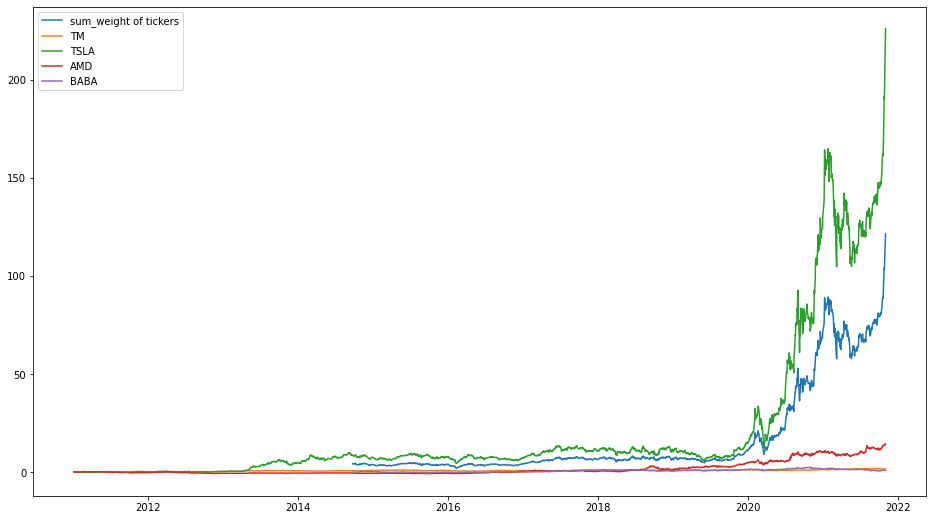

In [37]:
 #portfolio distribution 50%, 50%

return_series_adj_dict = {}
for i in range(0, len(tickers)):
  return_series_adj_dict[tickers[i]] = (df_dict[tickers[i]]["Adj Close"].pct_change()+ 1).cumprod() - 1
 

weight_tickers_dict= {}
sum_weighted_returns_dict= {}
for i in range(0, len(tickers)):
    weight_tickers_dict[tickers[i]] = 0.5 * (return_series_adj_dict[tickers[i]])
  

#Sum the weighted returns for  2 tickers
sum_weighted_returns_dict["sum_weighted"]= sum(weight_tickers_dict.values())



#Plot the weighted returns and individual returns on the same plot for comparison
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(sum_weighted_returns_dict["sum_weighted"], label = "sum_weight of tickers")
ax.legend()

for i in range(0, len(tickers)):
    
    ax.plot(return_series_adj_dict[tickers[i]] , label = tickers[i])
    ax.legend()


In [38]:
#for portfolio volatility 
#Note that to be able to apply weights, we cannot use raw prices for volatility calculations, hence create return close series

return_series_close_dict = {}
for i in range(0, len(tickers)):
  return_series_close_dict[tickers[i]] = (df_dict[tickers[i]]["Close"].pct_change()+ 1).cumprod() - 1

weighted_return_series_close_dict={}
for i in range(0, len(tickers)):

    weighted_return_series_close_dict[tickers[i]] = 0.5 * (return_series_close_dict[tickers[i]])
  

sum_weighted_returns_close_dict={}
#Sum the weighted returns for 2 tickers
sum_weighted_returns_close_dict["sum_weighted_close"]= sum(weighted_return_series_close_dict.values())


return_series_tickers = sum_weighted_returns_dict["sum_weighted"].tail(1)
print("Portfolio Return", tickers[0],"-",tickers[len(tickers)-1],":", return_series_tickers.round(3))

print(" ")

vol_tickers = np.sqrt(252) * np.log((sum_weighted_returns_close_dict["sum_weighted_close"]+1)/(sum_weighted_returns_close_dict["sum_weighted_close"]+1).shift(1)).std()
print("Portfolio Volatility", tickers[0], "-" , tickers[len(tickers)-1], ":", vol_tickers.round(3))



Portfolio Return TM - BABA : Date
2021-11-01    121.346
Name: Adj Close, dtype: float64
 
Portfolio Volatility TM - BABA : 0.486


Sharpe Ratio

In [39]:

#multiply the daily pct.change() with the weights


returns_ts_dict = {}
for i in range(0, len(tickers)):
  returns_ts_dict[tickers[i]] = df_dict[tickers[i]]["Adj Close"].pct_change().dropna()


weighted_return= {}

for i in range(0, len(tickers)):
    weighted_return[tickers[i]]= 0.5 * (returns_ts_dict[tickers[i]])



returns_dict ={}

returns_dict["sum_returns"]= sum(weighted_return.values())

#find the average daily return
avg_daily_return =returns_dict["sum_returns"].mean()
print("Avg daily rate for", tickers[0],"-",tickers[len(tickers)-1],"-", avg_daily_return )


#create a risk free annual rate column in the DF. You can set the rate to 0.01 0r 0(to test if RAR matches with pyfolio results)
#the annual rf rate must be divided by 252 to spread it across the year
risk_free_ann_ret_rate1 = 0

#create the risk free rate column
for i in range(0, len(returns_dict)):
  returns_dict["sum_returns"]['RiskFree_Rate'] = risk_free_ann_ret_rate1/252
  returns_dict



#find the average rf rate
avg_rf_rate = returns_dict["sum_returns"]['RiskFree_Rate'] .mean()
print("Avg risk free rate for", tickers[0], tickers[len(tickers)-1], "-", avg_rf_rate)

Avg daily rate for TM - BABA - 0.0029593474050751754
Avg risk free rate for TM BABA - 0.0


In [40]:
#create the excess returns column
returns_dict["sum_returns"]["sum_returns"] =  returns_dict["sum_returns"] - returns_dict["sum_returns"]['RiskFree_Rate']


#calculate sharpe ratio

sharpe_ratio = ((avg_daily_return - avg_rf_rate) /returns_dict["sum_returns"]["sum_returns"].std())*np.sqrt(252)
  
  
  
print("----------Sharpe Ratio for :"+ tickers[0] + tickers[len(tickers)-1] + "----------")
display(sharpe_ratio.round(2))



----------Sharpe Ratio for :TMBABA----------


1.26

## Predicting Prices 

GOAL: `Build a Recurrent Neural Network (RNN) with LSTM cells to predicts stock market price.`

`LSTM models are able to store information over a period of time, thus it is extremely useful when we deal with Time-Series or Sequential Data. `

In [41]:
tickers = ['BABA', 'TSLA']
start_date = '2010-01-01'
end_date = '2021-11-01'

# 2. Save all tickers to a dict
df_dict = {}
for ticker in tickers:
    df_dict[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)


Defining Hyperparameters

In [42]:
# Defining hyperparameters for splitting
WINDOW_SIZE = 60  # using 60 days prices to predict the 61 day
TRAIN_SIZE = 0.7

In [43]:
# Defining hyperparameters for the model
N_NEURONS = 32
N_FEATURES = 1
CELL = LSTM
N_LAYERS = 4
DROPOUT = 0.2
BIDIRECTIONAL = False
ACTIVATION = 'linear'
LOSS = "mse"
OPTIMIZER = "adam"

NameError: name 'LSTM' is not defined

In [ ]:
# Defining hyperparameters for training
BATCH_SIZE = 32  # no. of data on each training iteration
EPOCHS = 5 # no. of times the algo will pass through the entire training dateset

Building LSTM Model  

In [ ]:
def build_model(n_neurons, sequence_length, n_features, cell, n_layers, dropout, bidirectional, activation, loss, optimizer):
    model = Sequential()

    for j in range(n_layers):
        if j == 0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(n_neurons, return_sequences=True),
                                        batch_input_shape=(None, sequence_length, n_features)))
            else:
                model.add(cell(n_neurons, return_sequences=True,
                               batch_input_shape=(None, sequence_length, n_features)))

        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(
                    cell(n_neurons, return_sequences=True)))
            else:
                model.add(cell(n_neurons, return_sequences=True))

        # add dropout after each layer to reduce overfitting
        model.add(Dropout(dropout))

    # add dense layer as output layer with 1 neuron
    model.add(Dense(1, activation=activation))
    model.compile(loss=loss, metrics=[
                  "mean_squared_error"], optimizer=optimizer)

    return model


Create a scaler as scaling high values from 0 to 1 will help the neural network to learn much faster and more effectively.

Reshaping data because LSTM network expects the input to be in 3 dimensional: 
1. number of samples 
2. number of time steps
3. number of features 

Currently, only 2 dimensions which are samples and time steps, thus need to add in the number of feature which is 1.


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
model = build_model(N_NEURONS, WINDOW_SIZE, N_FEATURES, CELL, N_LAYERS, DROPOUT, BIDIRECTIONAL, ACTIVATION, LOSS, OPTIMIZER)

train_len_dict = {}
ytest_dict = {}
metrics_dict = {}
validate_dict = {}
predict_dict = {}

for i in range(0, len(tickers)):
    close_price = df_dict[tickers[i]].filter(["Close"])
    # Convert df to numpy array
    dataset = close_price.values
    
    # Get no. of rows to train model
    train_len = math.ceil(len(dataset) * TRAIN_SIZE)
    train_len_dict[tickers[i]] = train_len

    # Creating the training dataset
    train = dataset[0: train_len, :]
    train = scaler.fit_transform(train)

    # Split into X_train and y_train
    X_train = []
    y_train = []
    for j in range(WINDOW_SIZE, len(train)):
        X_train.append(train[j - WINDOW_SIZE : j, 0])
        y_train.append(train[j, 0])
        # if j <= WINDOW_SIZE:
        #     print(X_train)
        #     print(y_train)
    
    # converting to numpy arrays 
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Creating the test dataset
    test = dataset[train_len - WINDOW_SIZE:, :]
    test = scaler.fit_transform(test)


    # Split into X_test and y_test
    X_test = []
    y_test = dataset[train_len:, :] # not scaled values
    ytest_dict[tickers[i]] = y_test

    for j in range(WINDOW_SIZE, len(test)):
        X_test.append(test[j-WINDOW_SIZE:j, 0])
    
    # converting to numpy arrays 
    X_test = np.array(X_test)

    # Reshaping the data
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # fitting the model
    model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

    # predicting 
    result = model.predict(X_test)

    predictions = []
    for j in range(0, len(result)):
        predictions.append(result[j][WINDOW_SIZE-1])
    
    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)
    predict_dict[tickers[i]] = predictions

In [ ]:
# Getting the predicted prices 
# predict_dict['TSLA']

Evaluate the model 

In [ ]:
for i in range(0, len(tickers)):
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predict_dict[tickers[i]]  - ytest_dict[tickers[i]])**2)))
    metrics_dict[tickers[i]] = rmse

    # Visualising the prediction 
    actual = df_dict[tickers[i]][:train_len_dict[tickers[i]]]
    validate = df_dict[tickers[i]][train_len_dict[tickers[i]]:]
    validate["Predictions"] = predict_dict[tickers[i]] 
    validate_dict[tickers[i]] = validate[["Close", "Predictions"]]

    plt.figure(figsize=(16, 8))
    plt.title("Model for " + tickers[i])
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Close Price USD ($)", fontsize=18)
    plt.plot(actual["Close"])
    plt.plot(validate[["Close", "Predictions"]])
    plt.legend(["Train", "Validate", "Predictions"], loc="lower right")
    plt.show()

In [ ]:
# Get the root mean squared error (RMSE)
metrics_dict

In [ ]:
for i in range(0, len(validate_dict)):
    print("----------Prediction for " + tickers[i] + "----------")
    display(validate_dict[tickers[i]])

### ARIMA Model


#### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary


In [ ]:

tickers = ['BABA', 'TSLA']
start_date = '2015-01-01'
end_date = '2021-11-01'


df_dict = {}
for ticker in tickers:
    df_dict[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)


In [ ]:
# Test for staionarity
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries, autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output['critical value (%s)' % key] = values
    print(output)


In [ ]:
for i in range(0, len(tickers)):
    print("------------------------------" +tickers[i] + "------------------------------")
    test_stationarity(df_dict[tickers[i]]['Close'])


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values.



In [ ]:
result_dict = {}
for i in range(0, len(tickers)):
    result_dict[tickers[i]] = seasonal_decompose(df_dict[tickers[i]]['Close'], model='multiplicative', freq=30)

    fig = plt.figure()  
    fig = result_dict[tickers[i]].plot()  
    fig.set_size_inches(16, 9)

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

In [ ]:
log_dict = {}
ma_dict = {}
sd_dict = {}
for i in range(0, len(tickers)):
    df_log = np.log(df_dict[tickers[i]]['Close'])
    log_dict[tickers[i]] = df_log
    ma_dict[tickers[i]] = df_log.rolling(12).mean()
    sd_dict[tickers[i]] = df_log.rolling(12).std()


In [ ]:
# split data into train and training set
train_dict = {}
test_dict = {}
for i in range(0, len(tickers)):
    train_data, test_data = log_dict[tickers[i]][3:int(len(log_dict[tickers[i]])*0.9)], log_dict[tickers[i]][int(len(log_dict[tickers[i]])*0.9):]
    train_dict[tickers[i]] = train_data
    test_dict[tickers[i]] = test_data


In [ ]:
for i in range(0, len(tickers)):
    model_autoARIMA = auto_arima(train_dict[tickers[i]], start_p=0, start_q=0,
                             test='adf', # use adftest to find optimal 'd'
                             max_p=3, max_q=3, # maximum p and q
                             m=1, # frequency of series
                             d=None, # let model determine 'd'
                             seasonal=False, # No Seasonality
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True,stepwise=True)
    print("---------------------------------------------" + tickers[i] + "--------------------------------------------")
    print(model_autoARIMA.summary())
    # model_autoARIMA.plot_diagnostics(figsize=(15,8))
    # plt.show()


#### For the plots: 
Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggest normal distribution with mean zero.
Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

So the Auto ARIMA model provided the value of p, d, and q as 0, 1 and 0 respectively.


In [ ]:
best_order = [(0, 1, 1), (0, 1, 0), (0, 1, 0), (1, 0, 1), (0, 1, 0)]
fitted_dict = {}

for i in range(0, len(tickers)):
    model = ARIMA(train_dict[tickers[i]], order=best_order[i])  
    fitted_dict[tickers[i]] = model.fit()  
    # print("---------------------------------------------" + tickers[i] + "--------------------------------------------")
    # print(fitted_dict[tickers[i]].summary())

In [ ]:
# Forecast
validate_dict = {}

for i in range(0, len(tickers)):
    fc, se, conf = fitted_dict[tickers[i]].forecast(
        len(test_dict[tickers[i]]), alpha=0.05)  # 95% confidence
    fc_series = pd.Series(fc, index=test_dict[tickers[i]].index)
    lower_series = pd.Series(conf[:, 0], index=test_dict[tickers[i]].index)
    upper_series = pd.Series(conf[:, 1], index=test_dict[tickers[i]].index)

    # report performance
    rmse = math.sqrt(mean_squared_error(test_dict[tickers[i]], fc))
    # print('RMSE: '+str(rmse))

    validate = df_dict[tickers[i]][int(len(log_dict[tickers[i]])*0.9):]
    validate['Predictions'] = np.exp(fc)
    validate = validate[['Close', 'Predictions']]
    validate_dict[tickers[i]] = validate

    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train_dict[tickers[i]], label='training')
    plt.plot(test_dict[tickers[i]], color='blue', label='Actual Stock Price')
    plt.plot(fc_series, color='orange', label='Predicted Stock Price')
    plt.fill_between(lower_series.index, lower_series,
                     upper_series, color='k', alpha=.10)
    plt.title(tickers[i] + ' Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Actual Stock Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    # report performance
    mse = mean_squared_error(test_dict[tickers[i]], fc)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(test_dict[tickers[i]], fc)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mean_squared_error(test_dict[tickers[i]], fc))
    print('RMSE: '+str(rmse))
    mape = np.mean(np.abs(fc - test_dict[tickers[i]])/np.abs(test_dict[tickers[i]]))
    print('MAPE: '+str(mape))


# EFFICIENT FRONTIER


In [ ]:
#EF
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['TY', 'TSLA', 'BA', 'AMD']
RISKY_ASSETS.sort()
START_DATE = '2020-11-01'
END_DATE = '2021-11-01'

n_assets = len(RISKY_ASSETS)

In [ ]:


prices_df = data.DataReader(RISKY_ASSETS,'yahoo', start=START_DATE, 
                        end=END_DATE)

returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS


In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                    np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
    
portf_sharpe_ratio = portf_rtns / portf_vol

In [ ]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': 
                                  portf_sharpe_ratio})

N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2) 
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == 
                           portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

In [ ]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
               y=avg_returns[asset_index], 
               marker=MARKS[asset_index], 
               s=150, 
               color='black',
               label=RISKY_ASSETS[asset_index])
ax.legend()

In [ ]:
#obtain the best working portfolio out of all portfolios
#max sharpe ratio
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

#min_vol ratio
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)
    
print('\n')

print('Minimum Volatility ratio portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

In [ ]:
#plotting both aforementioned vars
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='black', marker='P', 
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

In [ ]:
#using scipy
import numpy as np
import scipy.optimize as sco


def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constraints = ({'type': 'eq', 
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) 
                         - ret},
                       {'type': 'eq', 
                        'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, 
                                           initial_guess, 
                                           args=args, 
                                           method='SLSQP', 
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
    
    return efficient_portfolios

In [ ]:
rtns_range = np.linspace(-0.22, 0.32, 200)

efficient_portfolios = get_efficient_frontier(avg_returns, 
                                              cov_mat, 
                                              rtns_range)

vols_range = [x['fun'] for x in efficient_portfolios]

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')


In [ ]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                 'Volatility': min_vol_portf_vol,
                 'Sharpe Ratio': (min_vol_portf_rtn / 
                                  min_vol_portf_vol)}

In [ ]:
print('Minimum volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x, y in zip(RISKY_ASSETS, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

# FIVE FACTOR MODEL

In [ ]:
#CODE FROM THIS POINT COVERS ALL THE FACTORS
#Five factor model including momentum

#Define Variables
ASSETS = ['TY', 'TSLA', 'BA', 'AMD']
WEIGHTS = [0.2,0.2,0.3,0.3]
START_DATE = '2014-01-01'
END_DATE = '2021-11-01'

# momentum factor
df_mom = data.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()

# five factors
df_five_factor = data.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()


In [ ]:
#obtain asset portfolio
asset_df = data.DataReader(ASSETS,
                           'yahoo',
                       start= START_DATE,
                       end= END_DATE
                     )

asset_df = asset_df['Adj Close'].resample('M') \
                                .last() \
                                .pct_change() \
                                .dropna()

asset_df.index = asset_df.index.strftime('%Y-%m')

asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, 
                                          WEIGHTS)
print(asset_df)

In [ ]:
#Portfolio manipulation
# join all datasets on the index
all_factor_data = df_five_factor.join(df_mom).join(asset_df).drop(ASSETS, axis=1)


# rename columns
all_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 
                            'rf','mom', 'rtn']

# divide everything (except returns) by 100
all_factor_data.loc[:, all_factor_data.columns != 'rtn'] /= 100

# select period of interest
all_factor_data = all_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
all_factor_data['excess_rtn'] = all_factor_data.rtn - all_factor_data.rf

In [ ]:
#running the OLS regression to get results
all_factor_model = smf.ols(
    formula='excess_rtn ~ mkt + smb + hml + rmw + cma + mom', 
    data=all_factor_data
).fit()

print(all_factor_model.summary())

In [ ]:
Excess_return_2021 = all_factor_model.params['Intercept'] 
+ (all_factor_model.params['mkt'] * all_factor_data['mkt'].tail(1) * 1 if all_factor_model.pvalues['mkt'] < 0.05 else 0) 
+ (all_factor_model.params['smb'] * all_factor_data['smb'].tail(1) * 1 if all_factor_model.pvalues['smb'] < 0.05 else 0) 
+ (all_factor_model.params['hml'] * all_factor_data['hml'].tail(1) * 1 if all_factor_model.pvalues['hml'] < 0.05 else 0) 
+ (all_factor_model.params['rmw'] * all_factor_data['rmw'].tail(1) * 1 if all_factor_model.pvalues['rmw'] < 0.05 else 0) 
+ (all_factor_model.params['cma'] * all_factor_data['cma'].tail(1) * 1 if all_factor_model.pvalues['cma'] < 0.05 else 0) 
+ (all_factor_model.params['mom'] * all_factor_data['mom'].tail(1) * 1 if all_factor_model.pvalues['mom'] < 0.05 else 0) 


print(Excess_return_2021)

# Risk Effects


In [47]:
RISKY_ASSETS = ['TY', 'TSLA', 'BA', 'AMD']
SHARES = [100,100,100,100]
START_DATE = '2010-01-01'
END_DATE = '2021-11-01'
T = 1
N_SIMS = 10 ** 5

df = yf.download(RISKY_ASSETS, start=START_DATE, 
                 end=END_DATE, adjusted=True)

[*********************100%***********************]  4 of 4 completed


In [48]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

cov_mat = returns.cov()
chol_mat = np.linalg.cholesky(cov_mat)


In [49]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

In [50]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [51]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T + 
                   sigma * np.sqrt(T) * correlated_rv)

P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [52]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: ${-y:.2f}')

#There is 99% confidence that the maximum amount loss by holding the portfolio for one day is $5.73


1-day VaR with 99.99% confidence: $317.59
1-day VaR with 99.9% confidence: $231.88
1-day VaR with 99.0% confidence: $108.77


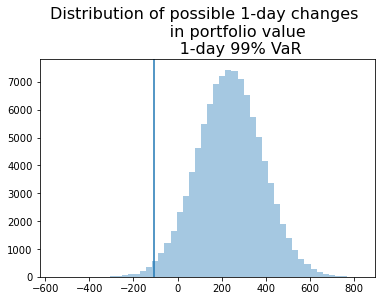

In [53]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title('''Distribution of possible 1-day changes 
             in portfolio value 
             1-day 99% VaR''', fontsize=16)
ax.axvline(var[2], 0, 10000);

# Sentiment Analysis

In [54]:

finnhub_client = finnhub.Client(api_key="sandbox_c625gkiad3iacs613mp0")

print(finnhub_client.news_sentiment('AAPL'))

{'buzz': {'articlesInLastWeek': 260, 'buzz': 0.7492, 'weeklyAverage': 347}, 'companyNewsScore': 0.6207, 'sectorAverageBullishPercent': 0.6408, 'sectorAverageNewsScore': 0.5257, 'sentiment': {'bearishPercent': 0.25, 'bullishPercent': 0.75}, 'symbol': 'AAPL'}


# Pair Trading Strategy

In [55]:
tickers = ['TM','GM','TTM','TSLA','STLA','F','AMD']

start_date = '2011-01-01'
end_date = '2021-11-01'

# Use pandas_reader.data.DataReader to load data
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)['Close']

In [56]:
panel_data.head()

Symbols,TM,GM,TTM,TSLA,STLA,F,AMD
Date,,,,,,,
2010-12-31,78.629997,36.860001,29.340000,5.326,5.853289,16.790001,8.18
2011-01-03,79.430000,37.060001,30.059999,5.324,6.217105,17.250000,8.47
2011-01-04,79.860001,37.900002,29.260000,5.334,6.611842,17.379999,8.77
2011-01-05,80.199997,38.070000,29.030001,5.366,6.644737,17.889999,8.91
2011-01-06,81.540001,38.900002,28.139999,5.576,6.414474,18.219999,8.69


In [57]:
close_price = panel_data
close_price.describe().round(2)

Symbols,TM,GM,TTM,TSLA,STLA,F,AMD
count,2728.00,2728.00,2728.00,2728.00,2728.00,2728.00,2728.00
mean,117.50,34.61,25.41,114.47,10.28,12.22,21.16
std,24.34,8.21,10.57,200.03,5.48,2.93,28.14
min,60.39,16.80,4.08,4.37,2.80,4.01,1.62
25%,106.59,30.10,18.29,28.73,6.12,10.12,3.73
50%,120.17,34.59,25.68,46.97,9.09,12.26,7.92
75%,130.37,37.58,32.72,66.80,14.75,14.59,26.36
max,186.52,63.92,51.47,1208.59,24.81,18.79,125.23


In [58]:
#Finding cointegrated pairs
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('TM', 'GM')]


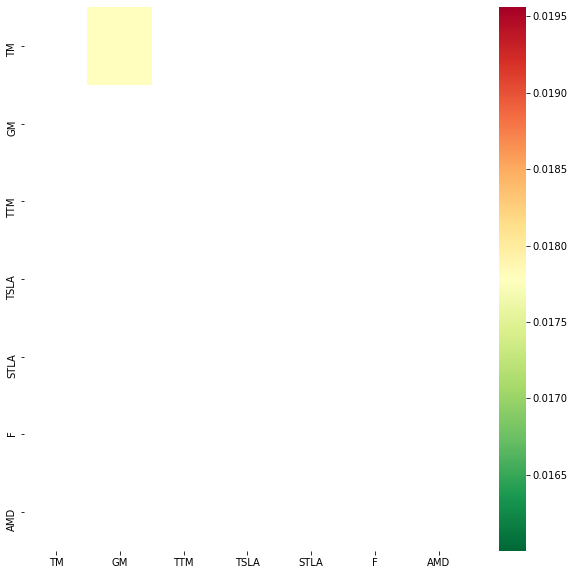

In [59]:
scores, pvalues, pairs = find_cointegrated_pairs(panel_data)
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [60]:
S1=panel_data['TM']
S2=panel_data['GM']

score, pvalue, _ = coint(S1, S2)
pvalue

0.01778117047164326

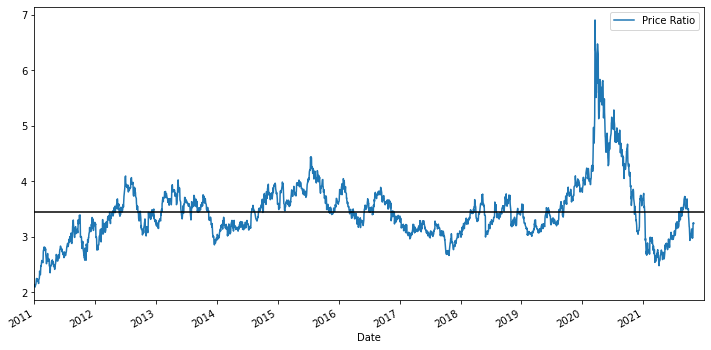

In [67]:
S1=panel_data['TM']
S2=panel_data['GM']

ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2011-01-01', '2021-12-31')
plt.legend(['Price Ratio']);

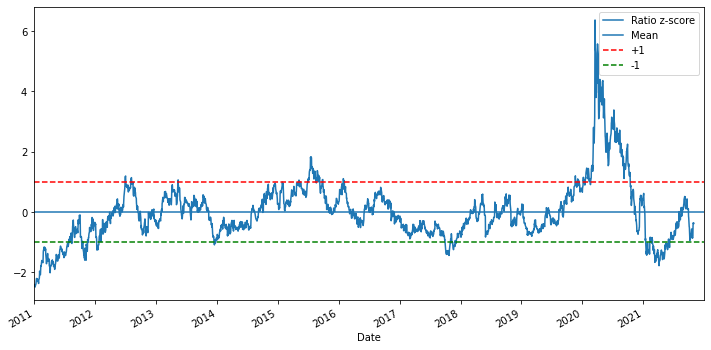

In [68]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.xlim('2011-01-01', '2021-12-31')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [63]:
#train/test split  70/30

ratios = panel_data['TM'] / panel_data['GM'] 
print(len(ratios) * .70 ) 

1909.6


In [64]:
train = ratios[:round(len(ratios) * .70 )]
test = ratios[round(len(ratios) * .70 ):]

In [65]:
# Compute rolling mean and rolling standard deviation
def calc_zscore(ratios, window1, window2):
    ma1 = ratios.rolling(window=window1,center=False).mean()
    ma2 = ratios.rolling(window=window2,center=False).mean()
    std = ratios.rolling(window=window2,center=False).std()
    zscore = (ma1 - ma2)/std
    return zscore

def plot_explain(S1, S2, window1, window2, zscore_60_5, gold_marker_gain, gold_marker_loss):
    ratio = S1 / S2
    # Plot price buy sell
    plt.figure(figsize=(18,9))
    buy = ratio.copy()
    sell = ratio.copy()
    buy[zscore_60_5>-1] = 0
    sell[zscore_60_5<1] = 0
    # Init buyR and sellR
    S1[window2:].plot(color='b')
    S2[window2:].plot(color='c')
    buyR = 0*S1.copy()
    sellR = 0*S1.copy()
    # When buying the ratio, buy S1 and sell S2
    buyR[buy!=0] = S1[buy!=0]
    sellR[buy!=0] = S2[buy!=0]
    # When selling the ratio, sell S1 and buy S2 
    buyR[sell!=0] = S2[sell!=0]
    sellR[sell!=0] = S1[sell!=0]
    # Plot buy and sell
    buyR[window2:].plot(color='g', linestyle='None', marker='^')
    sellR[window2:].plot(color='r', linestyle='None', marker='^')
    x1,x2,y1,y2 = plt.axis()
    plt.axis( (x1, x2, min(S1.min(),S2.min()), max(S1.max(),S2.max()) ) )
    plt.legend(['TM','GM', 'Buy Signal', 'Sell Signal'])
    plt.show()
    # plot zscore
    plt.figure(figsize=(18,7))
    zscore_60_5.plot()
    plt.axhline(0, color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    gold_marker_gain.plot(color='g', linestyle='None', marker='^')
    gold_marker_loss.plot(color='r', linestyle='None', marker='^')
    plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
    plt.show()

def trade(S1, S2, window1, window2, zthreshhold_buysell=1.0, zthreshhold_clear=0.5, doplot=False):
    maximum_S1_needed = 0
    maximum_S2_needed = 0
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    ratios = S1/S2
    zscore = calc_zscore(ratios, window1, window2)
    # Simulate trading
    money = 0
    countS1 = 0
    countS2 = 0
    gain_count = 0
    gain_amount = 0.0
    loss_count = 0
    loss_amount = 0.0
    gold_marker_gain = zscore.copy()
    gold_marker_gain[:] = float('nan')
    gold_marker_loss = zscore.copy()
    gold_marker_loss[:] = float('nan')
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > zthreshhold_buysell:
            tmp = S1[i] - S2[i] * ratios[i]
            money += tmp
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -zthreshhold_buysell:
            tmp = S2[i] * ratios[i] - S1[i]
            money += tmp
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < zthreshhold_clear:
            tmp = countS1*S1[i] + S2[i] * countS2
            if maximum_S1_needed < countS1:
                maximum_S1_needed = countS1
            if maximum_S2_needed < countS2:
                maximum_S2_needed = countS2
            if tmp > 0:
                gain_count += 1
                gain_amount += tmp
                gold_marker_gain[i] = zscore[i]
            elif tmp < 0:
                loss_count += 1
                loss_amount += tmp
                gold_marker_loss[i] = zscore[i]
            money += tmp
            countS1 = 0
            countS2 = 0
    tmp = countS1*S1[i] + S2[i] * countS2
    if tmp > 0:
        gain_count += 1
        gain_amount += tmp
    else:
        loss_count += 1
        loss_amount += tmp
    money += tmp
    # plot
    if doplot:
        plot_explain(S1, S2, window1, window2, zscore, gold_marker_gain, gold_marker_loss)
 
    print("Gain amount:",gain_amount)
    print("Loss amount:", loss_amount)
    print("maximum_S1_needed: %f" % maximum_S1_needed)
    print("maximum_S2_needed: %f" % maximum_S2_needed)
    print("Money that is gained addtionally from buy/sell: %f" % money)
   

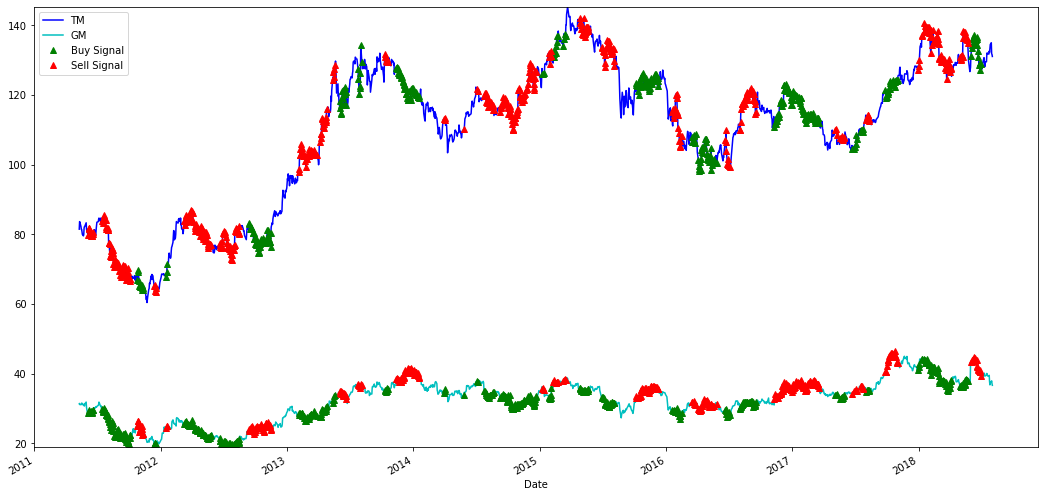

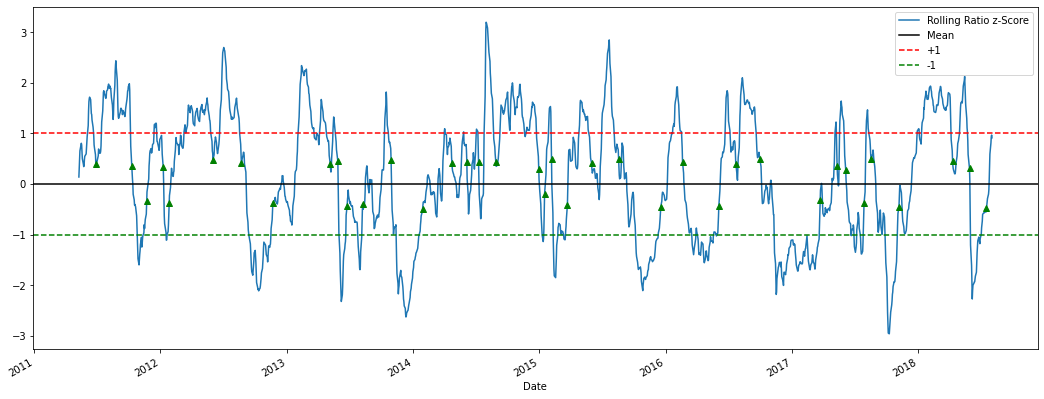

Gain amount: 3618.705339664361
Loss amount: 0.0
maximum_S1_needed: 88.000000
maximum_S2_needed: 271.422965
Money that is gained addtionally from buy/sell: 3618.705340


In [66]:
# extra money earned from pair trading Training set
trade(panel_data['TM'].iloc[:round(len(ratios) * .70 )] , panel_data['GM'].iloc[:round(len(ratios) * .70 )], 5, 90, zthreshhold_buysell=1.0, doplot=True)

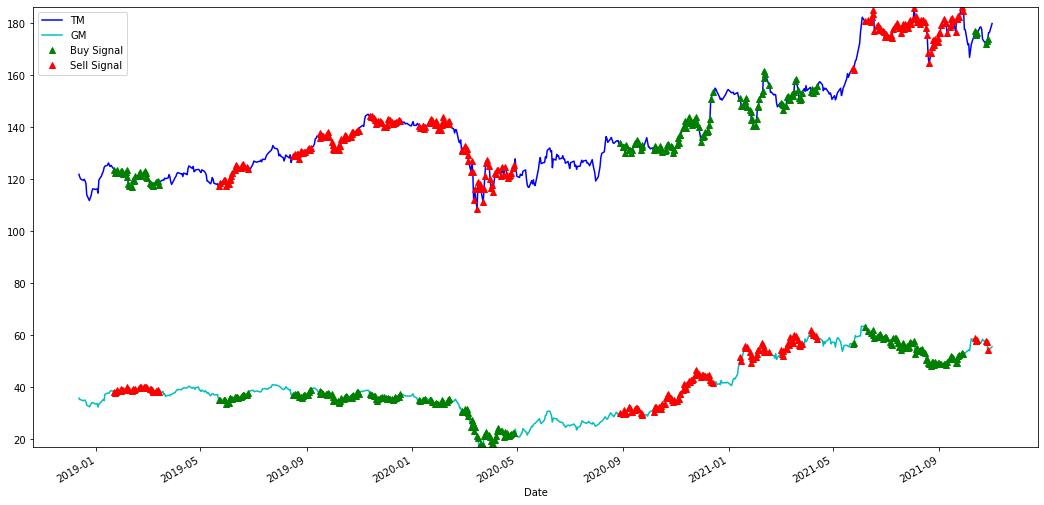

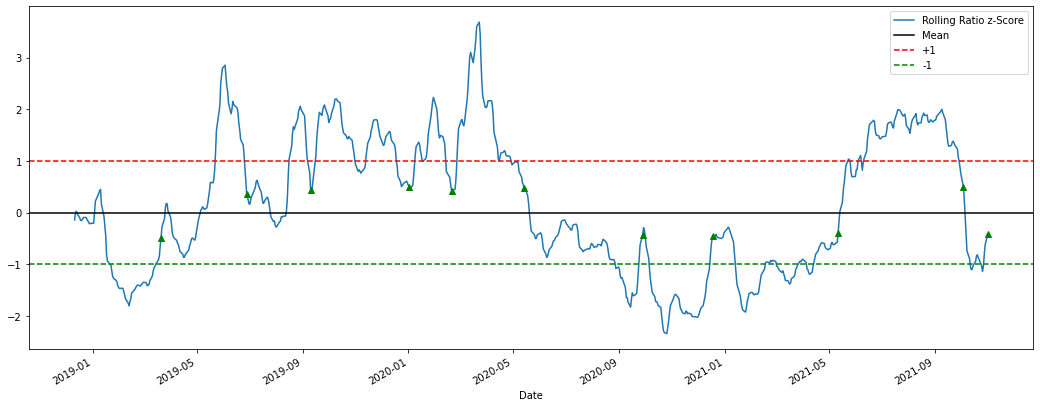

Gain amount: 2110.2530112168142
Loss amount: 0.0
maximum_S1_needed: 49.000000
maximum_S2_needed: 259.297029
Money that is gained addtionally from buy/sell: 2110.253011


In [89]:
# extra money earned from pair trading test set
trade(panel_data['TM'].iloc[round(len(ratios) * .70 ):] , panel_data['GM'].iloc[round(len(ratios) * .70 ):], 5, 90, zthreshhold_buysell=1.0, doplot=True)